## **Image Processing Using OpenCV**

Image processing is an important step in computer vision and deep learning tasks. In this section of the lab, we are going to explore fundamental image processing techniques using OpenCV.

### **Loading & Displaying an Image**

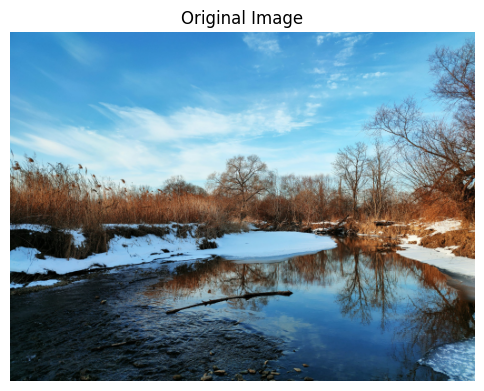

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import imutils

# Function to display images in Jupyter Notebook
def show_image(title, image):
    plt.figure(figsize=(6, 6))
    if len(image.shape) == 3:  # Color image
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:  # Grayscale image
        plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Loading an image
image_url = "https://images.unsplash.com/photo-1579353977828-2a4eab540b9a?fm=jpg&q=60&w=3000&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mnx8c2FtcGxlfGVufDB8fDB8fHww"
resp = urllib.request.urlopen(image_url)
image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
image = imutils.resize(image, width=512)
show_image('Original Image', image)

### **Grayscale Conversion**

Many image processing tasks require grayscale images since color is not always necessary.

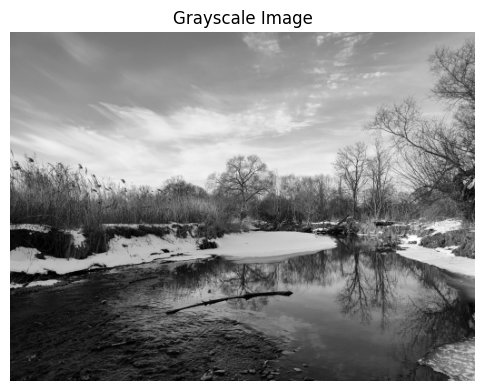

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image('Grayscale Image', gray)

### **Common Image Filters**

Blurring helps in noise reduction and preprocessing for downstream tasks such as edge detection.

**Gaussian Blur**

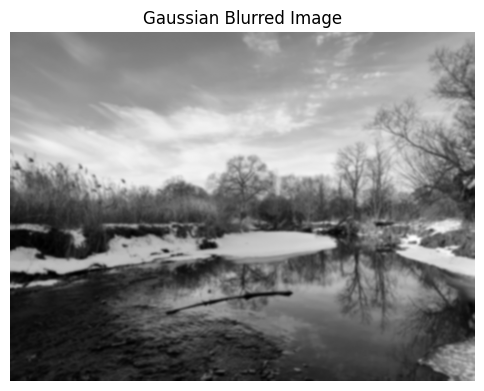

In [ ]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
show_image('Gaussian Blurred Image', blurred)

**Edge Detection (Sobel, Canny)**

Sobel Edge Detection - Sobel operators help detect edges in the x and y directions.

In [ ]:
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)  # X-direction
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)  # Y-direction

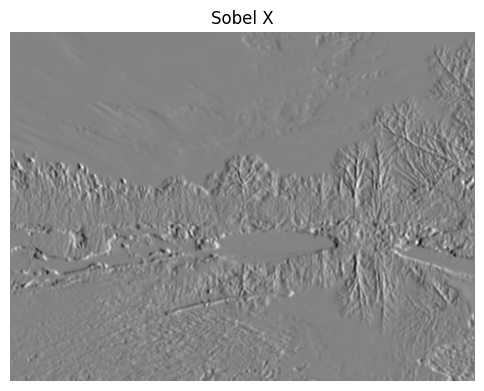

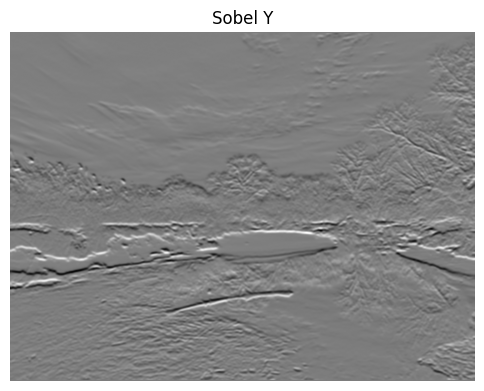

In [ ]:
show_image('Sobel X', sobelx)
show_image('Sobel Y', sobely)

Canny Edge Detection - Canny edge detection is a multi-step process that detects edges quite robustly.

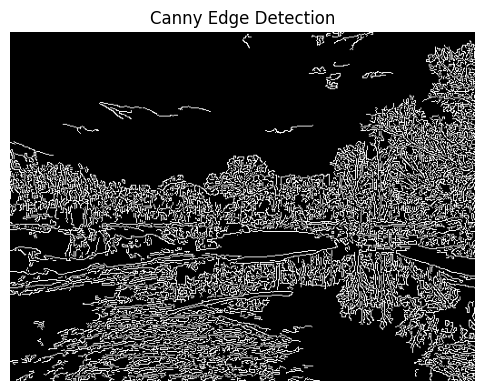

In [ ]:
canny_edges = cv2.Canny(gray, 50, 150)
show_image('Canny Edge Detection', canny_edges)

**Morphological Transformations (Dilation, Erosion)**

Help in refining image structures and removing noise.

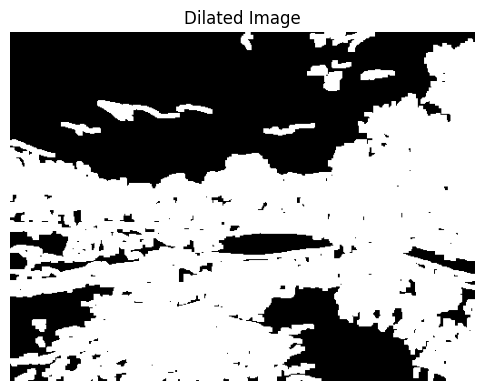

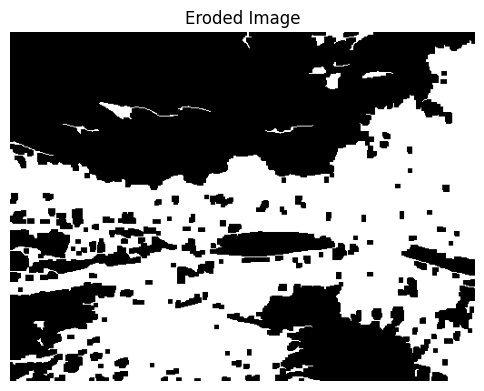

In [ ]:
kernel = np.ones((5,5), np.uint8)

# Dilation expands the white regions, helping to fill in gaps.
dilated = cv2.dilate(canny_edges, kernel, iterations=1)
show_image('Dilated Image', dilated)

# Erosion shrinks the white regions, often used to remove noise.
eroded = cv2.erode(dilated, kernel, iterations=1)
show_image('Eroded Image', eroded)

Applying preprocessing techniques can affect deep learning model predictions by improving features or removing noise. Let us visualize how different preprocessing steps affect the same image.

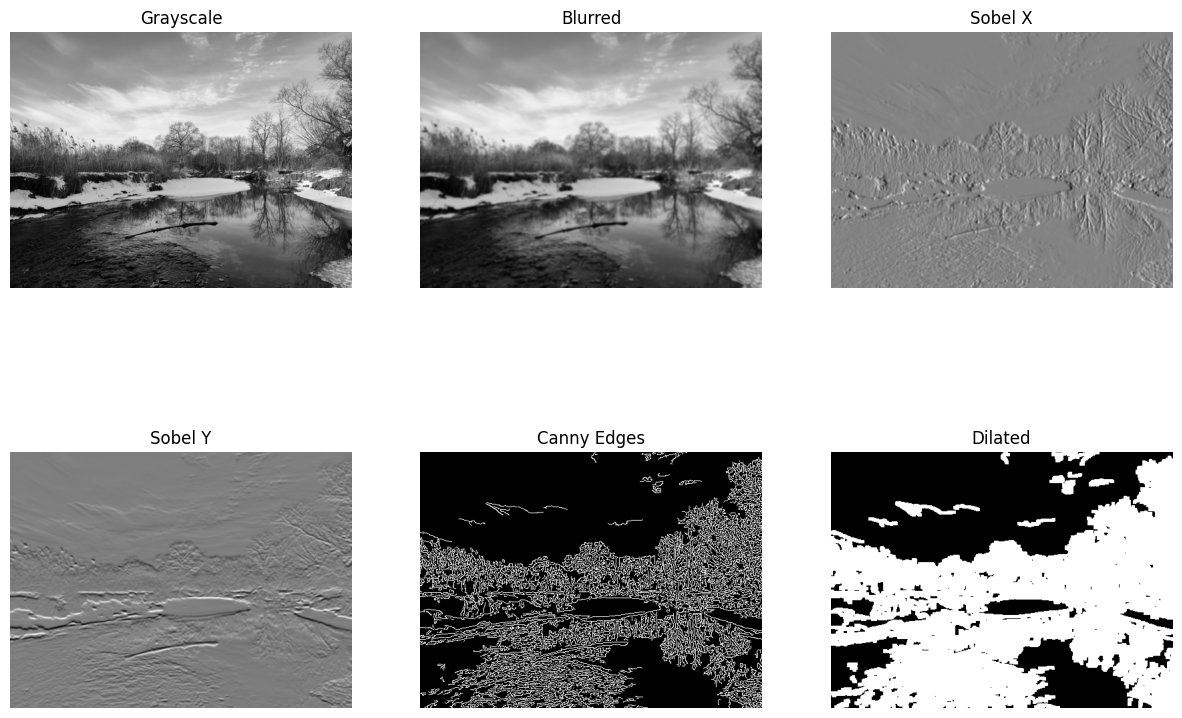

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

images = [gray, blurred, sobelx, sobely, canny_edges, dilated]
titles = ['Grayscale', 'Blurred', 'Sobel X', 'Sobel Y', 'Canny Edges', 'Dilated']

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(titles[i])
    ax.axis('off')

plt.show()

## **MNIST Dataset & Image Representation**

### **Loading & Displaying MNIST**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist

# Loading MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Displaying basic dataset information
print(f"Training set size: {train_images.shape}")
print(f"Testing set size: {test_images.shape}")

Training set size: (60000, 28, 28)
Testing set size: (10000, 28, 28)


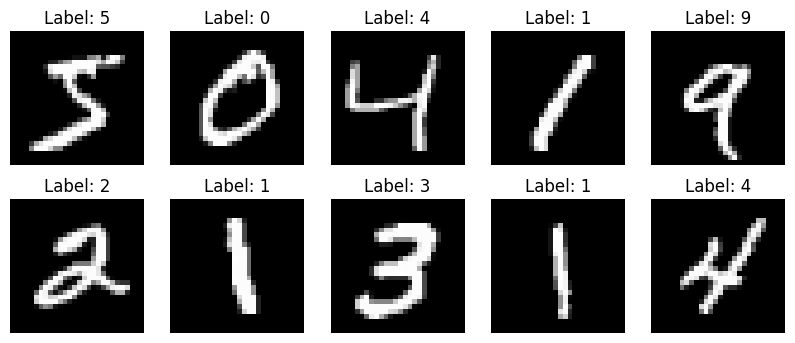

In [ ]:
# Function to visualize sample digits
def plot_sample_images(images, labels, num_samples=10):
    plt.figure(figsize=(10, 4))
    for i in range(num_samples):
        plt.subplot(2, num_samples // 2, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

plot_sample_images(train_images, train_labels)

### **Representation as Matrices**

In [ ]:
sample_image = train_images[0]
print(f"Shape of a single image: {sample_image.shape}")
print("Pixel matrix representation:")
print(sample_image)

Shape of a single image: (28, 28)
Pixel matrix representation:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 

### **Flattening vs Preserving Spatial Structure**

Flattened shape: (784,)


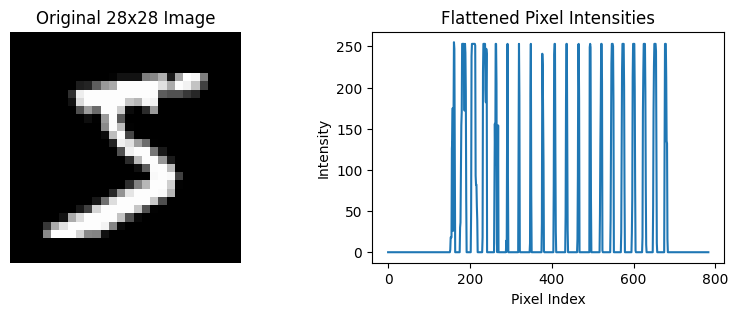

In [ ]:
flattened_image = sample_image.flatten()
print(f"Flattened shape: {flattened_image.shape}")

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.imshow(sample_image, cmap='gray')
plt.title("Original 28x28 Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(flattened_image)
plt.title("Flattened Pixel Intensities")
plt.xlabel("Pixel Index")
plt.ylabel("Intensity")
plt.show()

### **Pixel Intensitiy Distributions**

In [ ]:
def plot_intensity_distribution(image):
    plt.figure(figsize=(8, 4))
    sns.histplot(image.flatten(), bins=30, kde=True)
    plt.title("Pixel Intensity Distribution")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

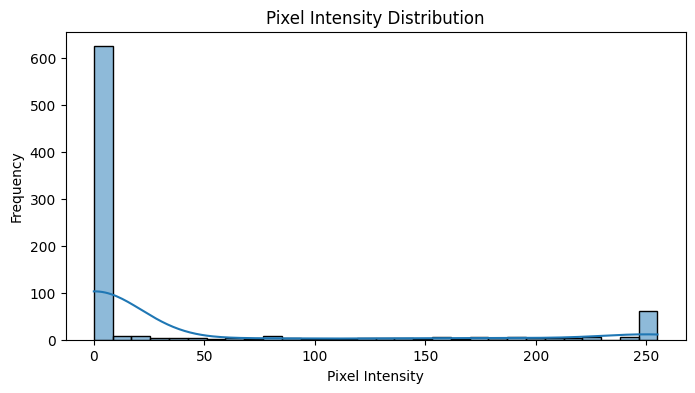

In [ ]:
plot_intensity_distribution(sample_image)

## **Training ANN on MNIST**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

### **Normalizing Images**

In [ ]:
# Loading MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalizing the images to [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flattening the images (28x28 -> 784)
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

### **Defining ANN**

In [ ]:
def build_model(activation='relu'):
    model = keras.Sequential([
        keras.layers.Dense(128, activation=activation, input_shape=(784,)),
        keras.layers.Dense(64, activation=activation),
        keras.layers.Dense(10, activation='softmax')
    ])
    return model

### **Compiling & Training ANN**

In [ ]:
model_relu = build_model(activation='relu')
model_relu.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

history_relu = model_relu.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8733 - loss: 0.4343 - val_accuracy: 0.9638 - val_loss: 0.1152
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9685 - loss: 0.1068 - val_accuracy: 0.9691 - val_loss: 0.1038
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9787 - loss: 0.0696 - val_accuracy: 0.9722 - val_loss: 0.0840
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9822 - loss: 0.0552 - val_accuracy: 0.9720 - val_loss: 0.0895
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9875 - loss: 0.0379 - val_accuracy: 0.9765 - val_loss: 0.0786
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9901 - loss: 0.0308 - val_accuracy: 0.9759 - val_loss: 0.0872
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9919 - loss: 0.0255 - val_accuracy: 0.9766 - val_loss: 0.0831
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - accuracy: 0.9927 - loss: 

### **Evaluating ANN**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9740 - loss: 0.1056
Test accuracy: 0.9786999821662903
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


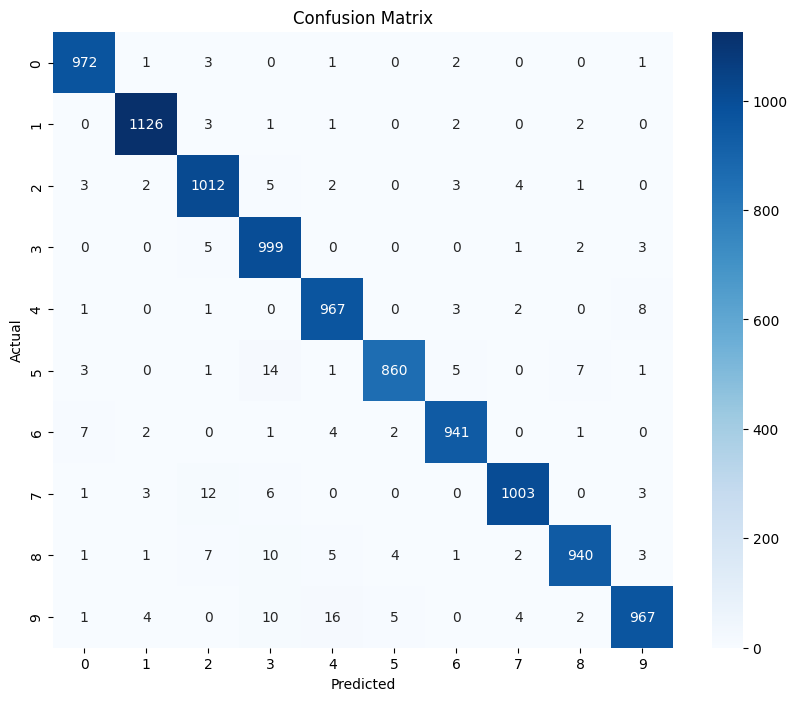

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.96      0.99      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.96      0.98       892
           6       0.98      0.98      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
test_loss, test_acc = model_relu.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

# Confusion Matrix and Classification Report
y_pred = np.argmax(model_relu.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8777 - loss: 0.4265 - val_accuracy: 0.9498 - val_loss: 0.1631
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9587 - loss: 0.1392 - val_accuracy: 0.9651 - val_loss: 0.1141
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9700 - loss: 0.0992 - val_accuracy: 0.9673 - val_loss: 0.1068
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9759 - loss: 0.0773 - val_accuracy: 0.9707 - val_loss: 0.1008
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9803 - loss: 0.0641 - val_accuracy: 0.9745 - val_loss: 0.0882
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9843 - loss: 0.0504 - val_accuracy: 0.9682 - val_loss: 0.1090
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9842 - loss: 0.0486 - val_accuracy: 0.9698 - val_loss: 0.0997
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9867 - loss: 0.039

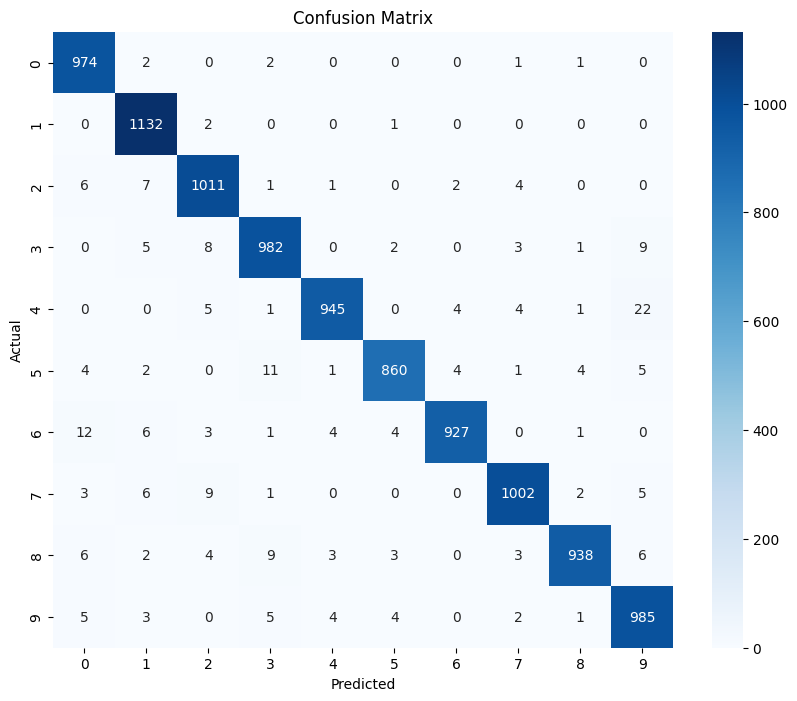

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.97      1.00      0.98      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.99      0.96      0.97       982
           5       0.98      0.96      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.99      0.96      0.98       974
           9       0.95      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8816 - loss: 0.4195 - val_accuracy: 0.9554 - val_loss: 0.1512
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.9616 - loss: 0.1268 - val_accuracy: 0.9660 - val_loss: 0.1098
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9756 - loss: 0.0820 - val_accuracy: 0.9719 - val_loss: 0.0900
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9837 - loss: 0.0544 - val_accuracy: 0.9744 - val_loss: 0.0834
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9875 - loss: 0.0420 - val_accuracy: 0.9753 - val_loss: 0.0792
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9906 - loss: 0.0314 - val_accuracy: 0.9756 - val_loss: 0.0833
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9924 - loss: 0.0253 - val_accuracy: 0.9789 - val_loss: 0.0682
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9943 - loss: 0

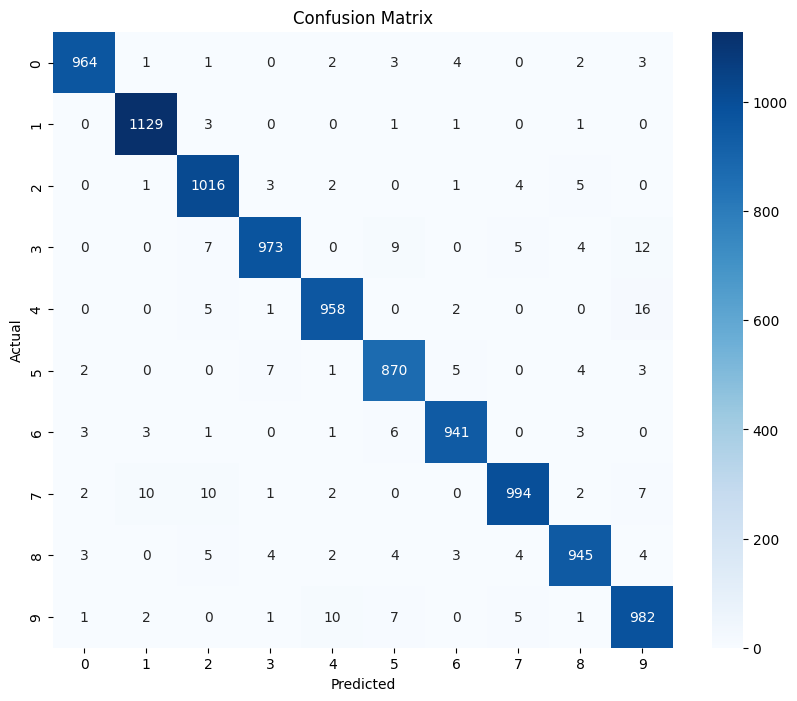

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.96      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.96      0.97      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7954 - loss: 0.8477 - val_accuracy: 0.9395 - val_loss: 0.2121
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9426 - loss: 0.1955 - val_accuracy: 0.9576 - val_loss: 0.1422
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9618 - loss: 0.1278 - val_accuracy: 0.9657 - val_loss: 0.1116
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9725 - loss: 0.0934 - val_accuracy: 0.9706 - val_loss: 0.0985
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9789 - loss: 0.0708 - val_accuracy: 0.9727 - val_loss: 0.0871
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9836 - loss: 0.0558 - val_accuracy: 0.9743 - val_loss: 0.0805
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9864 - loss: 0.0451 - val_accuracy: 0.9751 - val_loss: 0.0756
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9890 - loss: 0.03

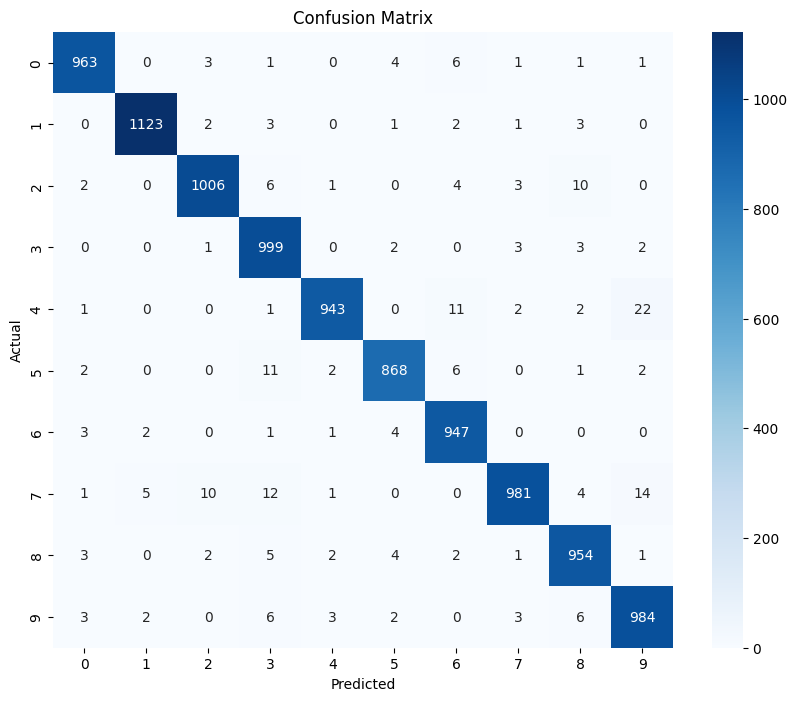

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.99      0.96      0.97       982
           5       0.98      0.97      0.98       892
           6       0.97      0.99      0.98       958
           7       0.99      0.95      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
# *********************************************
# TASK 1 - EXPERIMENT WITH ACTIVATION FUNCTIONS
# *********************************************

# Modify the ANN model to test different activation functions and
# compare their performance. Train three different models with tanh,
# sigmoid, and leaky_relu. Compare the test accuracies of these models.

# WRITE YOUR CODE HERE
# ******************Model with Leaky ReLU***************************
from tensorflow.keras.layers import LeakyReLU # Import LeakyReLU
model_leakyrelu = build_model(activation=LeakyReLU())
model_leakyrelu.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

history_leakyrelu = model_leakyrelu.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32)
test_loss, test_acc = model_leakyrelu.evaluate(x_test, y_test)
print("Test accuracy of Leaky Relu activation:", test_acc)
# Confusion Matrix and Classification Report
y_pred = np.argmax(model_leakyrelu.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred))
# ******************Model with tanh***************************
model_tanh = build_model(activation='tanh')
model_tanh.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

history_tanh = model_tanh.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32)
test_loss, test_acc = model_tanh.evaluate(x_test, y_test)
print("Test accuracy for tanh activation:", test_acc)
# Confusion Matrix and Classification Report
y_pred = np.argmax(model_tanh.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))
# ******************Model with sigmoid***************************
model_sigmoid = build_model(activation='sigmoid')
model_sigmoid.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

history_sigmoid = model_sigmoid.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32)
test_loss, test_acc = model_sigmoid.evaluate(x_test, y_test)
print("Test accuracy for sigmoid activation:", test_acc)
# Confusion Matrix and Classification Report
y_pred = np.argmax(model_sigmoid.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8741 - loss: 0.4016 - val_accuracy: 0.9682 - val_loss: 0.1088
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.9708 - loss: 0.0984 - val_accuracy: 0.9694 - val_loss: 0.0985
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9803 - loss: 0.0672 - val_accuracy: 0.9723 - val_loss: 0.0981
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9835 - loss: 0.0560 - val_accuracy: 0.9802 - val_loss: 0.0727
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9872 - loss: 0.0422 - val_accuracy: 0.9800 - val_loss: 0.0750
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9888 - loss: 0.0363 - val_accuracy: 0.9755 - val_loss: 0.1014
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9888 - loss: 0.0355 - val_accuracy: 0.9806 - val_loss: 0.0768
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9921 - loss

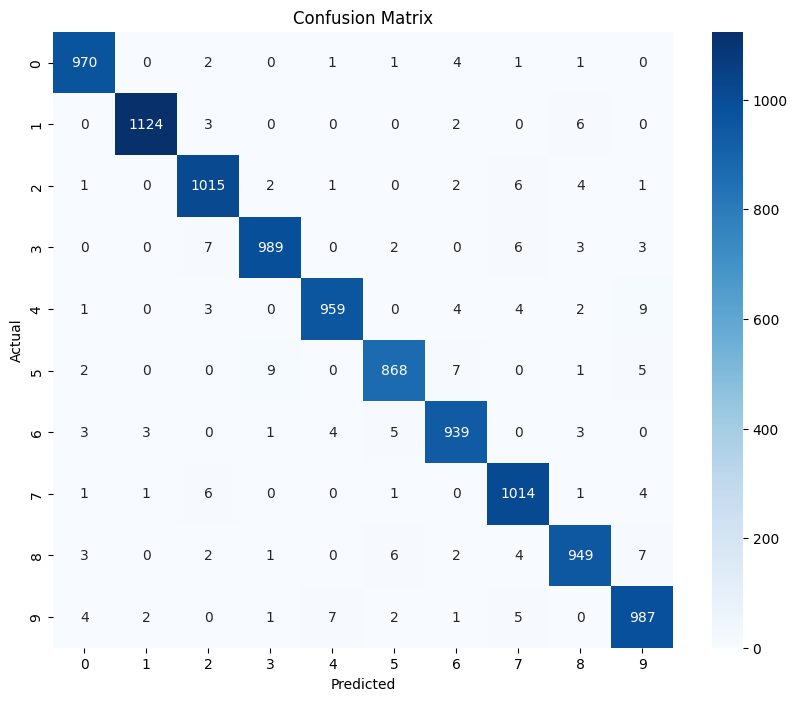

Classification Report of the ANN architecture I made:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
# *************************************
# TASK 2 - IMPLEMENT A DEEPER ANN MODEL
# *************************************

# Modify the existing ANN architecture to add more layers
# and test if it improves performance. Try to inclue 5 or more
# layers instead of two. Use different numbers of neurons in
# each layer. Train the model using relu activation and compare
# its test accuracy with the original two-layer model.

# WRITE YOUR CODE HERE
def build_model(activation='relu'):
    model = keras.Sequential([
        keras.layers.Dense(392, activation=activation, input_shape=(784,)),
        keras.layers.Dense(256, activation=activation),
        keras.layers.Dense(128, activation=activation),
        keras.layers.Dense(64, activation=activation),
        keras.layers.Dense(32, activation=activation),
        keras.layers.Dense(10, activation="softmax")
    ])
    return model
model_custom_relu = build_model(activation='relu')
model_custom_relu.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

history_relu = model_custom_relu.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32)
test_loss, test_acc = model_custom_relu.evaluate(x_test, y_test)
print("Test accuracy of the ANN architecture I made:", test_acc)

# Confusion Matrix and Classification Report
y_pred = np.argmax(model_custom_relu.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report of the ANN architecture I made:")
print(classification_report(y_test, y_pred))
# *************************************
# *************************************

## **Introduction to CNNs**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
import cv2

CNNs are specialized neural networks designed for processing structured grid-like data (like images).

**Why CNNs for Images?**

Traditional neural networks do not scale well to large images. CNNs efficiently capture spatial hierarchies.

In [ ]:
def load_sample_image():
    (x_train, y_train), _ = mnist.load_data()
    sample_image = x_train[0]
    plt.imshow(sample_image, cmap='gray')
    plt.title("Sample Image from MNIST Dataset")
    plt.axis("off")
    plt.show()
    return sample_image

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


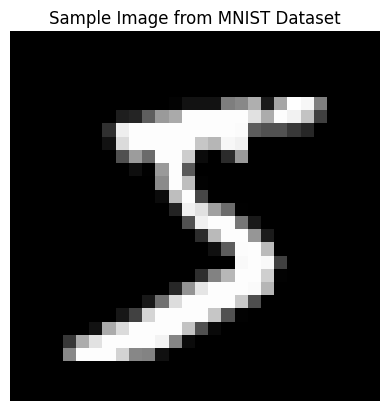

In [ ]:
sample_image = load_sample_image()

### **Convolutional Layers**

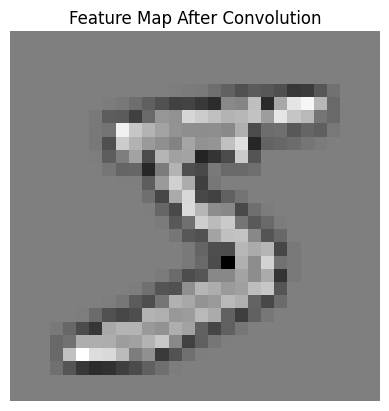

In [ ]:
def apply_convolution(image, kernel):
    image = image.astype(np.float32) / 255.0
    kernel = np.array(kernel, dtype=np.float32)
    convolved = cv2.filter2D(image, -1, kernel)
    return convolved

edge_detection_kernel = [[-1, -1, -1],
                         [-1,  8, -1],
                         [-1, -1, -1]]

convolved_image = apply_convolution(sample_image, edge_detection_kernel)
plt.imshow(convolved_image, cmap='gray')
plt.title("Feature Map After Convolution")
plt.axis("off")
plt.show()

### **Pooling Layers**

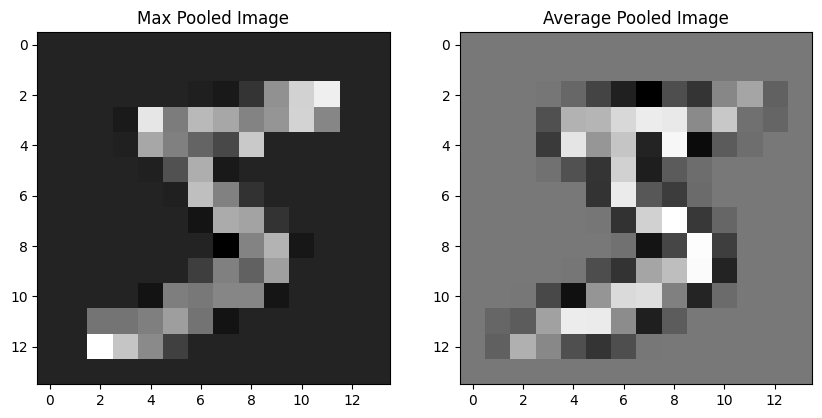

In [ ]:
def apply_pooling(image, pool_size=(2, 2), pooling_type='max'):
    h, w = image.shape
    new_h, new_w = h // pool_size[0], w // pool_size[1]
    pooled_image = np.zeros((new_h, new_w))
    for i in range(new_h):
        for j in range(new_w):
            region = image[i*2:(i+1)*2, j*2:(j+1)*2]
            if pooling_type == 'max':
                pooled_image[i, j] = np.max(region)
            else:
                pooled_image[i, j] = np.mean(region)
    return pooled_image

max_pooled_image = apply_pooling(convolved_image, pooling_type='max')
avg_pooled_image = apply_pooling(convolved_image, pooling_type='average')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(max_pooled_image, cmap='gray')
axs[0].set_title("Max Pooled Image")
axs[1].imshow(avg_pooled_image, cmap='gray')
axs[1].set_title("Average Pooled Image")
plt.show()

### **Building a Simple CNN**

In final CNN, fully connected layers at the end help in the decision / classification. They process the features extracted by previous layers.

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         346,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

## **Training CNN on MNIST**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

### **Normalizing Images**

In [ ]:
# Loading MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalizing the images to [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshaping the images for CNN input (28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

### **Defining CNN**

In [ ]:
def build_cnn_model():
    model = keras.Sequential([
        keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(64, (3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    return model

### **Compiling & Training CNN**

In [ ]:
cnn_model = build_cnn_model()
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history_cnn = cnn_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9098 - loss: 0.3021 - val_accuracy: 0.9861 - val_loss: 0.0455
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9865 - loss: 0.0457 - val_accuracy: 0.9889 - val_loss: 0.0341
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9925 - loss: 0.0266 - val_accuracy: 0.9889 - val_loss: 0.0346
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9932 - loss: 0.0203 - val_accuracy: 0.9888 - val_loss: 0.0350
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.9946 - loss: 0.0159 - val_accuracy: 0.9893 - val_loss: 0.0342
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9965 - loss: 0.0117 - val_accuracy: 0.9912 - val_loss: 0.0351
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9963 - loss: 0.0112 - val_accuracy: 0.9919 - val_loss: 0.0261
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9980 - loss: 0.006

### **Evaluating CNN**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9875 - loss: 0.0557
CNN Test accuracy: 0.9901000261306763
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


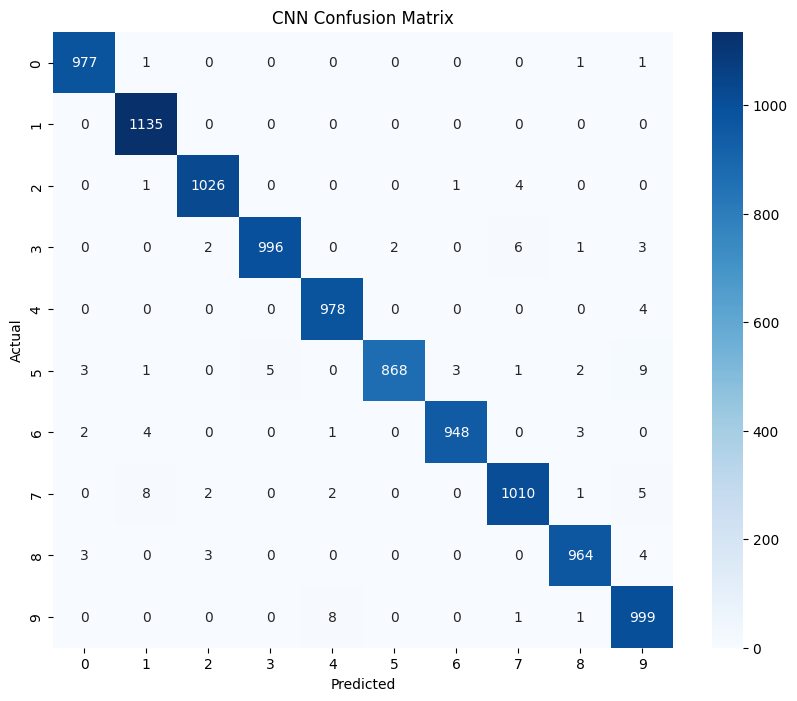

CNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       1.00      0.97      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
test_loss, test_acc = cnn_model.evaluate(x_test, y_test)
print("CNN Test accuracy:", test_acc)

# Confusion Matrix for CNN
y_pred_cnn = np.argmax(cnn_model.predict(x_test), axis=1)
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CNN Confusion Matrix')
plt.show()

print("CNN Classification Report:")
print(classification_report(y_test, y_pred_cnn))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 391,306 (1.49 MB)

 Trainable params: 390,858 (1.49 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8888 - loss: 0.3765 - val_accuracy: 0.9870 - val_loss: 0.0393
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9772 - loss: 0.0775 - val_accuracy: 0.9877 - val_loss: 0.0393
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9844 - loss: 0.0526 - val_accuracy: 0.9899 - val_loss: 0.0318
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9874 - loss: 0.0422 - val_accuracy: 0.9913 - val_loss: 0.0324
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9897 - loss: 0.0334 - val_accuracy: 0.9831 - val_loss: 0.0532
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9920 - loss: 0.0265 - val_accuracy: 0.9922 - val_loss: 0.0265
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9932 - loss: 0.0216 - val_accuracy: 0.9939 - val_loss: 0.0259
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9935 - loss: 0.02

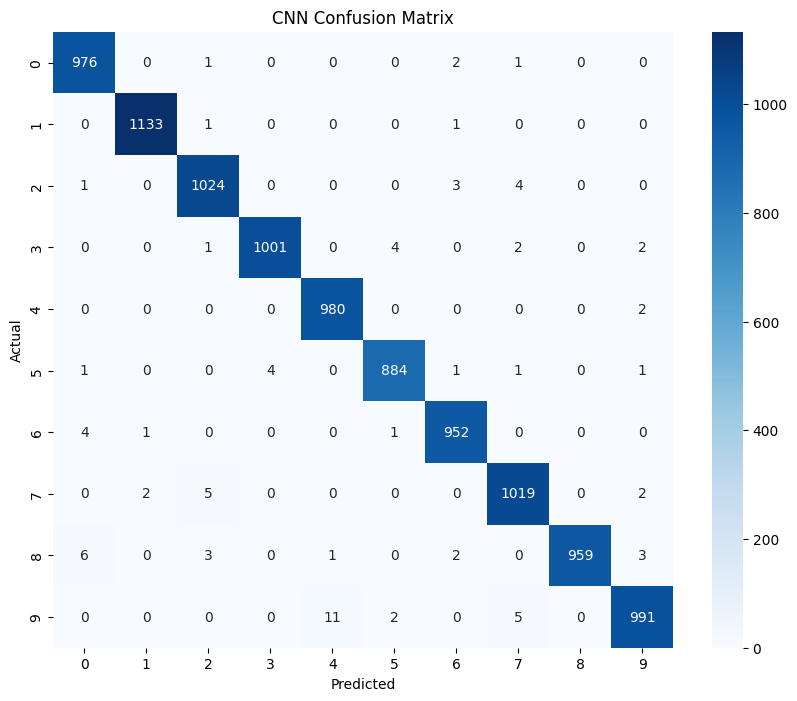

CNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# ************************************
# TASK 3 - MODIFY THE CNN ARCHITECTURE
# ************************************
# Modify the CNN model to experiment with different
# architectural choices and observe their impact on accuracy.
# Train the modified CNN model and compare its test accuracy
# with the original model.

# WRITE YOUR CODE HERE
import tensorflow as tf
from tensorflow import keras

def build_modified_cnn():
    model = keras.Sequential([
        # First Convolutional Block
        keras.layers.Conv2D(32, (3,3), padding="same", input_shape=(28, 28, 1)),
        keras.layers.BatchNormalization(),
        keras.layers.LeakyReLU(alpha=0.01),
        keras.layers.MaxPooling2D(2,2),

        # Second Convolutional Block
        keras.layers.Conv2D(64, (3,3), padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.LeakyReLU(alpha=0.01),
        keras.layers.MaxPooling2D(2,2),

        # Third Convolutional Block
        keras.layers.Conv2D(128, (3,3), padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.LeakyReLU(alpha=0.01),
        keras.layers.MaxPooling2D(2,2),

        # Flatten and Fully Connected Layers
        keras.layers.Flatten(),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.5),  # Dropout to reduce overfitting
        keras.layers.Dense(10, activation='softmax')
    ])

    return model

# Build and compile the model
model_modified = build_modified_cnn()
model_modified.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the modified model
model_modified.summary()

history_cnn = model_modified.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32)
test_loss, test_acc = model_modified.evaluate(x_test, y_test)
print("CNN Test accuracy:", test_acc)

# Confusion Matrix for CNN
y_pred_cnn = np.argmax(model_modified.predict(x_test), axis=1)
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CNN Confusion Matrix')
plt.show()

print("CNN Classification Report:")
print(classification_report(y_test, y_pred_cnn))
# ************************************
# ************************************

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9843 - loss: 0.0542 - val_accuracy: 0.9898 - val_loss: 0.0292
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9866 - loss: 0.0463 - val_accuracy: 0.9924 - val_loss: 0.0227
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9880 - loss: 0.0427 - val_accuracy: 0.9940 - val_loss: 0.0196
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9885 - loss: 0.0386 - val_accuracy: 0.9923 - val_loss: 0.0251
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9889 - loss: 0.0379 - val_accuracy: 0.9945 - val_loss: 0.0175
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9894 - loss: 0.0360 - val_accuracy: 0.9938 - val_loss: 0.0190
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9899 - loss: 0.0352 - val_accuracy: 0.9907 - val_loss: 0.0278
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9903 -

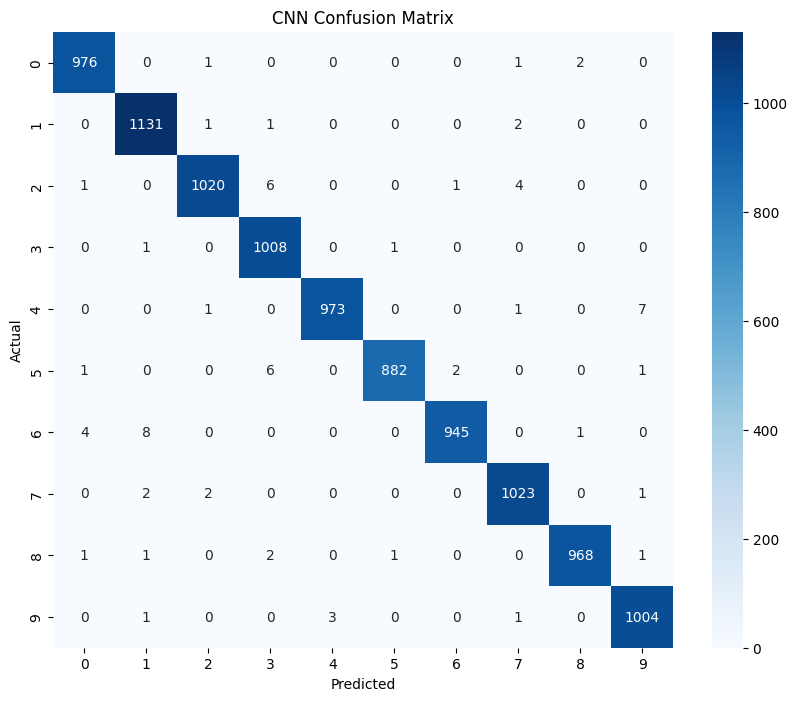

In [ ]:
# **************************
# TASK 4 - DATA AUGMENTATION
# **************************

# Use data augmentation to improve generalization.
# Use the ImageDataGenerator class from keras.preprocessing.image to apply
# (1) Rotation
# (2) Horizontal Shift
# (3) Vertical Shift
# WRITE YOUR CODE HERE
# Train a CNN again using the augmented dataset.
# Build and compile the model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,       # Rotate images by up to 15 degrees
    width_shift_range=0.1,   # Shift images horizontally by up to 10% of width
    height_shift_range=0.1   # Shift images vertically by up to 10% of height
)

# Fit the generator to training data
datagen.fit(x_train)
#Using the same CNN model I made in previous task.
history_cnn = model_modified.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(x_test, y_test)
)
test_loss, test_acc = model_modified.evaluate(x_test, y_test)
print("CNN Test accuracy:", test_acc)
# Confusion Matrix for CNN
y_pred_cnn = np.argmax(model_modified.predict(x_test), axis=1)
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CNN Confusion Matrix')
plt.show()
# **************************
# **************************

#**Description of Task 01:**
This code I wrote trains and evaluates three different Artificial Neural Network (ANN) models using different activation functions: Leaky ReLU, Tanh, and Sigmoid. It then compares their test accuracies using a confusion matrix and classification report.

###**01. Results of Task 01:**
The implementation of testing different activation functions (Leaky ReLU, Tanh, and Sigmoid) in an artificial neural network is structured well. The results indicate that all three activation functions achieved strong test accuracy, with slight variations:

- **Leaky ReLU:** 97.56%
- **Tanh:** 97.72%
- **Sigmoid:** 97.68%

### **02. My Observations:**
1. **Tanh performed slightly better** than the others, which makes sense as it provides zero-centered outputs and works well in deeper networks.
2. **Sigmoid had the lowest starting accuracy** but eventually caught up. It is more prone to vanishing gradient issues in deeper networks.
3. **Leaky ReLU performed almost as well as Tanh**, making it a good choice for networks where ReLU might suffer from "dying neurons."

---

# **Description of Task 02**
This task involves modifying the existing **Artificial Neural Network (ANN)** to make it deeper by adding more layers and neurons. The goal is to determine whether a deeper network improves performance compared to the original two-layer ANN.


### **1. Changes in the New Model:**
- **Increased the number of hidden layers:** Instead of just **2 layers**, this new architecture has **5 hidden layers**.
- **Used different numbers of neurons per layer:** The layers have **392, 256, 128, 64, and 32 neurons** to introduce a hierarchical feature extraction.
- **ReLU activation function** is used in all hidden layers, which helps in avoiding the vanishing gradient problem.
- The final layer uses **softmax activation**, suitable for multi-class classification (10 classes).


### **2. Model Architecture:**
```python
def build_model(activation='relu'):
    model = keras.Sequential([
        keras.layers.Dense(392, activation=activation, input_shape=(784,)),
        keras.layers.Dense(256, activation=activation),
        keras.layers.Dense(128, activation=activation),
        keras.layers.Dense(64, activation=activation),
        keras.layers.Dense(32, activation=activation),
        keras.layers.Dense(10, activation="softmax")
    ])
    return model
```
### **Explanation:**
- `keras.layers.Dense(392, activation=activation, input_shape=(784,))`
  - First layer with **392 neurons** (input size **784**, as it is a flattened 28×28 image).
- `keras.layers.Dense(256, activation=activation)`
  - Second layer with **256 neurons**.
- `keras.layers.Dense(128, activation=activation)`
  - Third layer with **128 neurons**.
- `keras.layers.Dense(64, activation=activation)`
  - Fourth layer with **64 neurons**.
- `keras.layers.Dense(32, activation=activation)`
  - Fifth layer with **32 neurons**.
- `keras.layers.Dense(10, activation="softmax")`
  - **Final output layer** with **10 neurons** (corresponding to **10 classes** in the dataset).
  - Uses **softmax activation** to output class probabilities.


### **3. Training the Model:**
Model is trained using:
- **Optimizer:** Adam (adaptive learning rate).
- **Loss Function:** Sparse categorical crossentropy (since labels are integer-encoded).
- **Metric:** Accuracy (for evaluation).

### **4. Results & Comparison:**
| Model            | Accuracy  |
|-----------------|-----------|
| **Original Two-Layer Model** | **97.87%** |
| **Deeper Model (5 Layers, ReLU)** | **98.14%** |

- **Deeper ANN improves accuracy** slightly (**from 97.87% to 98.14%**).
- **Reason:**
  - More layers allow better feature extraction.
  - **ReLU** prevents vanishing gradients.
  - **More neurons** help capture complex patterns.
- **Limitation:** The deeper model takes more **training time**.


### **5. My Observations:**
- A deeper ANN can slightly **improve accuracy**.  
- **ReLU is effective** for multi-layer networks.  
- **Increasing layers should be balanced** to avoid overfitting & excessive training time.  

---

# **Description of Task 03**

### **01. Architectural Modifications:**
The modified Convolutional Neural Network (CNN) incorporates several enhancements over a standard CNN model to improve accuracy and generalization:

1. **Convolutional Blocks with Batch Normalization & Leaky ReLU**
   - Three convolutional layers with increasing filter sizes (32, 64, and 128).
   - **Batch Normalization** is used after each convolutional layer to stabilize learning and speed up convergence.
   - **Leaky ReLU (α=0.01)** activation is applied instead of standard ReLU to prevent dead neurons.

2. **Pooling Layers for Downsampling**
   - MaxPooling layers (2×2) reduce the spatial dimensions after each convolutional block.

3. **Fully Connected Layers**
   - **Flattening** layer converts the feature maps into a 1D vector.
   - **Dense Layer (256 neurons, ReLU activation)** learns complex patterns.
   - **Dropout (50%)** is used to prevent overfitting.
   - **Output Layer (Softmax, 10 neurons)** for multi-class classification.


### **02. Training & Performance:**
- **Dataset**: The model was trained on a dataset with 60,000 training images and 10,000 test images(MNIST dataset).
- **Optimizer**: Adam optimizer was used for efficient weight updates.
- **Loss Function**: Sparse categorical cross-entropy.

#### **03. Training Results:**
- **Epochs**: 10
- **Final Training Accuracy**: 99.53%
- **Final Validation Accuracy**: 99.19%
- **Final Test Accuracy**: **99.01%**
- **Confusion Matrix**: The model showed minimal misclassifications.
- **Classification Report**: All classes achieved a precision and recall close to 99-100%, indicating excellent performance.


### **04. My Observations:**
- **Higher Accuracy**: Compared to a basic CNN, the modified model achieves nearly **99% test accuracy**, showing its robustness.  
- **Batch Normalization Helped**: Improved training stability and convergence speed.  
- **Leaky ReLU Prevented Dead Neurons**: Helped improve feature extraction.  
- **Dropout Reduced Overfitting**: The model performed well on both training and test data.  


---

### **Task 4 - Data Augmentation**
To enhance model generalization, you applied data augmentation using the **ImageDataGenerator** class from Keras, incorporating:
1. **Rotation:** Up to 15 degrees.
2. **Horizontal Shift:** Up to 10% of the image width.
3. **Vertical Shift:** Up to 10% of the image height.

### **01. Training Process**
- The augmented dataset was used to train the same CNN model from the previous task.
- The training process ran for **10 epochs**, achieving high accuracy.

### **02. Results**
- **Final Test Accuracy:** **99.3%**
- **Loss Reduction:** The model's loss decreased steadily across epochs, showing effective learning.
- **Confusion Matrix:** A heatmap was plotted to visualize classification performance.

### **03. My Observations**
- The model achieved high accuracy, indicating that augmentation helped improve robustness.
- The validation accuracy remained stable, suggesting that the model did not overfit.

---